# Probability Distributions

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Uniform Distribution

**Discrete:** &emsp; &emsp; &nbsp; $ P(X = k) = \dfrac{1}{n} $

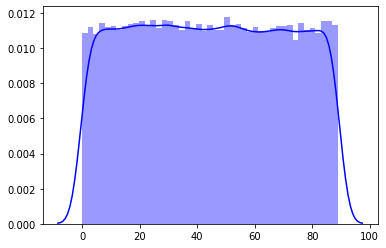

In [2]:
uniform__discrete_values = np.random.randint(0,90,90000)
sns.distplot(uniform__discrete_values, color = 'b');

In [3]:
#The values are discrete integers
uniform__discrete_values

array([24,  3, 84, ..., 86, 39, 87])

### Cumulative Distribution (CMF)
**Discrete:** &emsp; &emsp; &nbsp; $ P(X = k) = \dfrac{k}{n} $

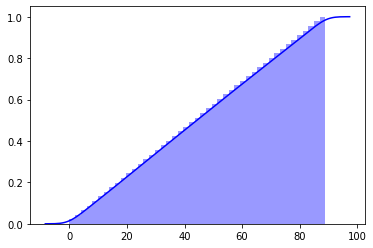

In [4]:
sns.distplot(uniform__discrete_values, color = 'b',
             hist_kws = dict(cumulative = True),
             kde_kws = dict(cumulative = True));

**Continuous:** &emsp; $ P(x) = \dfrac{1}{b-a} \quad \mbox{ for } a \leq x < b $

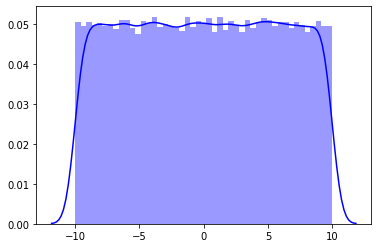

In [5]:
uniform_continuous_values = np.random.uniform(-10.0, 10.0, 100000)
sns.distplot(uniform_continuous_values, color = 'b');

In [6]:
#The values are continuous floats
uniform_continuous_values

array([-0.3703018 , -8.45563544, -8.76520377, ..., -9.24980422,
        2.56877471,  8.52445328])

### Binomial Distribution

$P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}$ <br>
In the cell below, we will simulate 10,000 repetitions of experiments where we flip a coin 10 times and count the number of heads. We then plot the results in a histogram

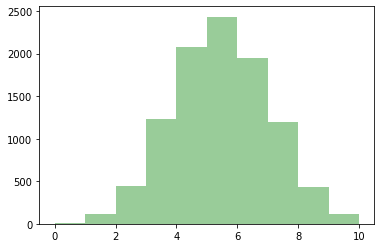

In [7]:
# n = number of trials, p = probability of success, k = number of successes in n trials
n = 10
p = .5
binomial_values = np.random.binomial(n, p, 10000)
sns.distplot(binomial_values, color = 'g', bins = 10, kde = False);

### Normal (Gaussian) Distribution

$ P(x) = \dfrac{1}{\sqrt{2 \pi \sigma}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} $

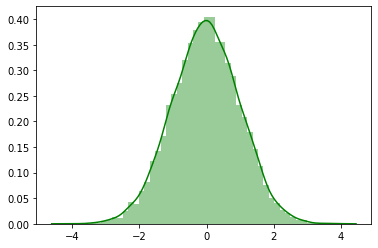

In [8]:
#mu = mean, sigma = standard deviation
mu = 0
sigma = 1.0
gaussian_values = np.random.normal(mu, sigma, 10000)
sns.distplot(gaussian_values, color = 'g');

**Gaussian CDF**

$ P(x) = \displaystyle\int_{-\infty}^{x}\dfrac{1}{\sqrt{2 \pi \sigma}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}dx $

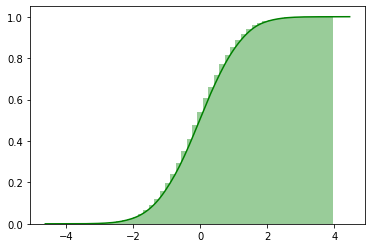

In [9]:
#Gaussian CDF
sns.distplot(gaussian_values, color = 'g',
             hist_kws = dict(cumulative = True),
             kde_kws = dict(cumulative = True));

### Poisson Distribution

$P(X = k) = \frac{e^{-\lambda}\lambda^k}{k!}$

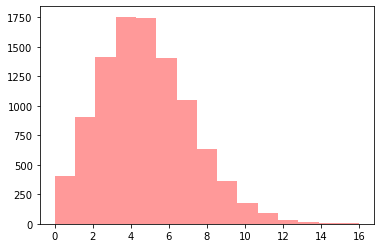

In [10]:
#lambda = average number of success per time interval
lambda_ = 5
poisson_values = np.random.poisson(lambda_, 10000)
sns.distplot(poisson_values, color = 'r', bins = 15, kde = False);

### Geometric Distribution

$P(X = k) = (1-p)^{k-1}p$

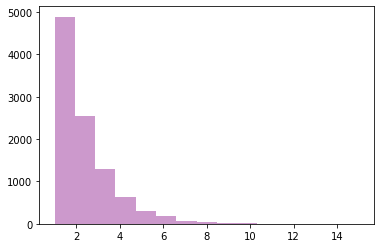

In [11]:
# p = probability of success, k = number of trials before first success
p = .5
geometric_values = np.random.geometric(p, 10000)
sns.distplot(geometric_values, color = 'purple', bins = 15, kde = False);

In [12]:
#values are discrete
geometric_values

array([1, 2, 2, ..., 4, 2, 1])

### Exponential Distribution 

$ P(x) = \displaystyle\int_{-\infty}^{x}\lambda e^{-\lambda x}dx $

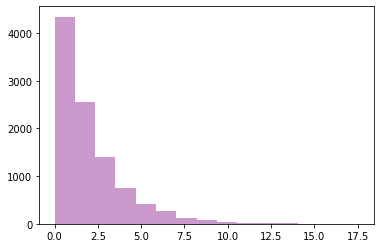

In [13]:
# lambda_ = average number of successes in time interval
lambda_ = 2
exponential_values = np.random.exponential(lambda_, 10000)
sns.distplot(exponential_values, color = 'purple', bins = 15, kde = False);

In [14]:
#values are continuous
exponential_values

array([3.92181702, 1.26144516, 2.5375097 , ..., 0.33139562, 2.37601769,
       0.20435651])

### Zipf/Zeta Distribution

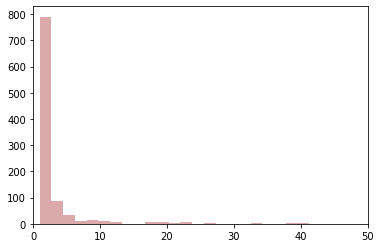

In [15]:
a = 2.
zipf_values = np.random.zipf(a, 1000)
g = sns.distplot(zipf_values, color = 'brown', bins = 500, kde = False);
g.set(xlim=(0,50));

### Pareto Distribution

$ P(x) = a\dfrac{m^a}{x^{a+1}} $

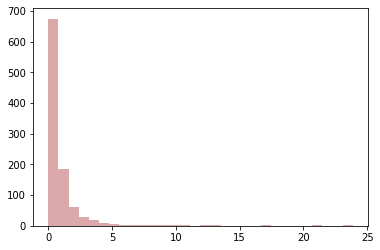

In [16]:
a = 2.
zeta_values = np.random.pareto(a, 1000)
g = sns.distplot(zeta_values, color = 'brown', bins = 30, kde = False);

### Checking model with Kolmogorov-Smirnov Goodness of Fit Test
Some tests that are available on scipy to compare distributions include  $\chi^2$ and KS,
but KS is much simpler to use. <br>
You would have to create appropriate bins using $\chi^2$, and it can get pretty messy.

In [23]:
from scipy.stats import ks_2samp

#Comparing binomial with large n to normal distribution
binomial_values = np.random.binomial(100, .5, 100)
mu = binomial_values.mean()
std = binomial_values.std()
gaussian_values = np.random.normal(mu, std, 100).astype(int)

In [24]:
#low D statistics (first returned value) indicates a good fit
#low p (under .05) rejects null hypothesis that distributions are the same
#so high p value means, well, at least we can't say the data isn't NOT a good fit
ks_2samp(binomial_values,gaussian_values)

Ks_2sampResult(statistic=0.10000000000000003, pvalue=0.6766201497002455)

In [25]:
#Try again with 2 distributions that should be identical
val1 = np.random.randint(0,10,1000)
val2 = np.random.randint(0,10,1000)

In [26]:
ks_2samp(val1,val2)

Ks_2sampResult(statistic=0.029000000000000026, pvalue=0.7887807460454146)

In [27]:
#Now an example with two clearly unrelated distributions
binomial_values = np.random.binomial(100, .5, 100)
geometric_values = np.random.geometric(.5, 100)

In [29]:
#statistic at 1 means the data is completely different
ks_2samp(binomial_values,geometric_values)

Ks_2sampResult(statistic=1.0, pvalue=1.5505547466854487e-45)